In [1]:
import sys

In [2]:
print(sys.path)
print(sys.executable)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']
/opt/homebrew/anaconda3/envs/optimization_env_munc/bin/python


In [3]:
try:
    import sklearn
    print('scikit-learn installed, version:', sklearn.__version__)
except Exception as e:
    print('scikit-learn not importable:', e)

scikit-learn installed, version: 1.7.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [5]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [6]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [7]:
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.1, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 10}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.001, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 1000},   # krc
        "kfq":      {"min": 0.001, "max": 10},   # kx2 uM-1s-1
        "krq":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "eDF":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "Sd":     {"min": 0.1,   "max": 10}, # scalar to change on/off kinetics of dimer to cluster
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 5},   # S0 (uM)
        "R0":        {"min": 0.1, "max": 10000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.01,   "max": 100}, # X0  (/um^2)
        "Q0":       {"min": 0.01,   "max":  100}, # Q0  (/um^2)
       
         
}



    # Order in which the solver will read parameters from a candidate
    # so, e.g. candidate[0] = kfsr.
   
params_to_optimize1 = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfq","krq","eLoop","eDF","kfdd","Sd","stimUpSR","S0","R0","X0","Q0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize1, t_max=maxTime)

Gamma is 333.3333333333333


# use a specific parameter set and look at the solution.
# only prestimulation

[4.64297134e+03 2.70476441e+05 1.23693616e+03 2.46948477e+02
 1.49118810e+00 1.04381434e+01 1.08570282e-03 1.22422315e-05
 1.86601893e-03 1.69892658e-03 1.15255909e+04 6.16315286e-03
 2.42598272e-10 4.05786581e-03 3.77395543e-02 5.56012453e-01
 6.17148331e+00 8.21302534e-02 6.73972025e+00 1.19991642e-02
 1.70415878e-01 1.25579120e+00 1.39713823e+01]
[6.1484415, 2.47671746, 1.11625578, 0.914658895, 1.68840656, 378.56905, 5.53016071, 0.0588041239, 0.00143764837, 4.95272629, 1.38241318, 0.0269006663, 0.534503527, 0.12392262, 3.04868969, 0.00260527236, 216.862139, 0.0242807191, 9.17643082]
CHI PRE STIMULATION
Cluster density chi: Simulated 0.021403332671417405, Experimental 0.024375, Chi -0.07431579612793876
Small cluster density chi: Simulated 0.001686422268168319, high density 0.021403332671417405, Chi 0
Percent of mem munc13 in clusters: 8.478477313769627%. Percent munc13 on the membrane: 28.972530009973234%. Monomer mem: 65.01970892643854%. Dimer mem: 25.961627752386697%
Percent of mem

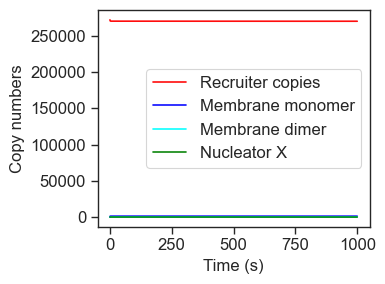

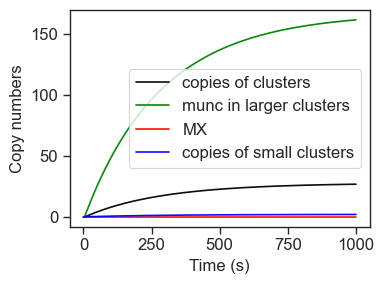

<Figure size 640x480 with 0 Axes>

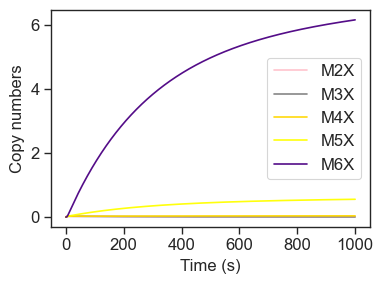

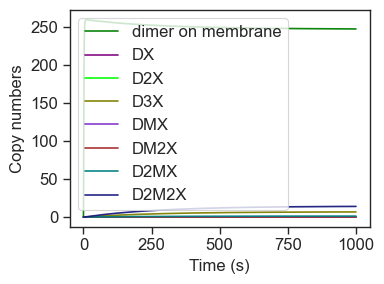

In [8]:
oneX=[3.088700131266726, 0.00450483548055323, 0.01, 2.8547791165201004, 0.1977235093258898, 2.298286075070547, 10, 10.53796403355309, 0.002211906814750523, 2.3769300119381946, 0.004979475007682301, 0.10182193400100219, 0.06489339917849135, 4.098074137723272, 86.94003369561015, 0.029889265464383308, 2.766947425589592, 0.2071291356300185, 0.32572378692162557]
oneX=[0.004378451415548672, 25.212619528244808, 0.5576853011841946, 4.483192893614176, 0.002144896820270633, 0.8684274367879211, 5.4747618686727515, 0.41506622209792954, 0.0020126674040488804, 1.4253304055683675, 0.37993874833853336, 0.0001, 0.025201741109629736, 0.5399789774489464, 3.0804202231833, 1.580310179628418, 4395.4575510255745, 0.09450825312530704, 0.8909123714951128]
oneX=[0.23281430196521388, 0.3020792185523193, 2.4596431130043723, 0.08227873670225092, 0.0016586730987022894, 0.027431026513689935, 2.8534176569323404, 0.08240521925515831, 0.0021303683389008368, 15.044058285227718, 1.1516714367115728, 0.00359480477288222, 0.09777789778526268, 1.7799700708238677, 1.9609052508824667, 0.04676436524783887, 28.69021183922275, 0.06858048987590365, 2.6007433846658676]
oneX = [0.02196682443888383, 0.024221996980248767, 0.09383703502503823, 71.87363547251414, 0.4373466975941304, 9.29236647616855, 4.563469910252494, 0.014632161446578357, 0.19042820239633704, 203.8769130683564, 3.7476536617257423, 3.356121899014217, 0.2370370131182034, 0.6809115463470394, 4.8560365323981545, 0.003838125315385462, 254.61007705809547, 0.03177207291106077, 30.424879215046452]
oneX=[0.32175099314489736, 0.01679295017703712, 1.5161896348256514, 74.6435819204278, 0.0020803515779714656, 0.10588979150562804, 0.7023776876121963, 0.11179238513910802, 0.15434771659796634, 11.857122598695423, 0.5414184712744827, 0.13581578789946966, 0.6676746386677206, 1.2299023338275445, 42.69296821966923, 0.00841624949927964, 55.02002960885758, 0.03540338490535835, 0.45311612636511023]
bothX=[0.40065265817023515, 208.42479169226417, 0.05922529211235344, 5.322235326350063, 0.13365748178783404, 49.30257706940459, 6.338793179799423, 0.010593541091591024, 0.37258038351855427, 0.010764879043004404, 6.637998410303344, 0.00013606179755723424, 0.08749602164547948, 1.345569898670226, 5.73710813931491, 0.43321606700443843, 3341.993769448174, 0.01615470876356924, 4.263621550816082]
bothX =[0.0012825046083164786, 0.282142888097171, 0.17087366651298977, 3.717962109972981, 0.014476043845094407, 0.6726903000490753, 8.583967332189594, 0.05904929059670602, 0.32934881173033526, 311.91892716464616, 1.971861749679203, 0.019031113584676865, 0.010894713341191005, 0.5343880351653314, 3.117261638427601, 1.4786432280386244, 115.11178023190827, 0.02134814853377007, 28.702319772934313]
bothX=[3.592326769116307, 14.598110082082034, 0.2076806261865792, 0.36056505891269497, 2.2990762040101664, 0.5300321617997789, 2.65594462746395, 0.32548762602469256, 0.11039579432816302, 1.3711969230867347, 0.15768647055845686, 2.8139302679422067, 0.49012813329558613, 1.7156720775351517, 8.602816705266456, 0.001926361298749802, 2027.9402223626598, 0.025655780868459547, 0.7340926811604398]
bothX=[3.582747690310984, 0.026521747908310467, 2.3531501904524794, 1.4004229572933233, 3.5713266534226227, 202.71719497194408, 10, 0.03045354090827682, 6.047059042286801, 18.467381420268985, 1.6580072387817137, 9.483247184118406, 0.09432011523044818, 0.2546920679717299, 54.902873869780116, 0.002575445458260657, 1.7201519315418294, 0.0232554910046056, 54.3529561686725]
bothX=[6.14844150e+00, 2.47671746e+00, 1.11625578e+00, 9.14658895e-01,
 1.68840656e+00, 3.78569050e+02, 5.53016071e+00, 5.88041239e-02,
 1.43764837e-03, 4.95272629e+00, 1.38241318e+00, 2.69006663e-02,
 5.34503527e-01, 1.23922620e-01, 3.04868969e+00, 2.60527236e-03,
 2.16862139e+02, 2.42807191e-02, 9.17643082e+00]
test_candidate=bothX
sol=model.simulate_pre(test_candidate)
print(sol[:,-1]*model.cellVolume*602.0)
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

In [9]:
#calculate the lifetime of the cluster
tau46, tau56 = model.calculate_lifetime_of_clusters(sol, test_candidate)
print(f"Cluster lifetimes (s) tau46: {tau46}, tau56: {tau56}")


Cluster lifetimes (s) tau46: 89.12349911514904, tau56: 14.537048859393128


Initial total Munc13 4642.971339478788, final total Munc 6566.2589795756085
Initial total R 270476.44140336744, final total R 272378.8465813607
Initial total X 1.4911880952614198, final total X 30.496583189880113
Initial total Q 11525.590946766659, final total C 11525.597109919994


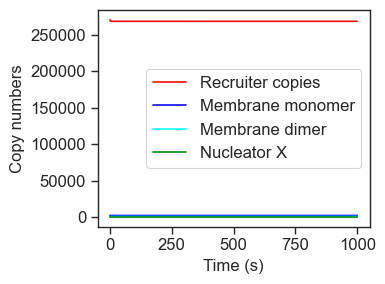

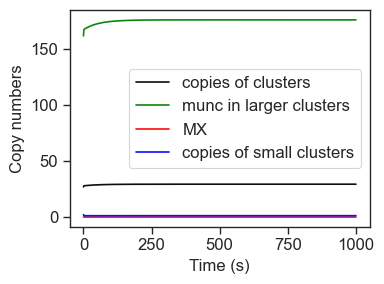

<Figure size 640x480 with 0 Axes>

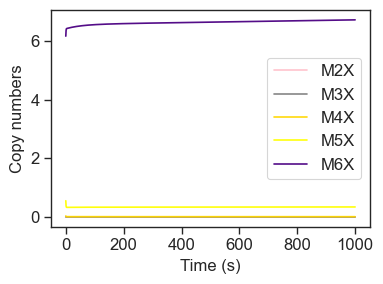

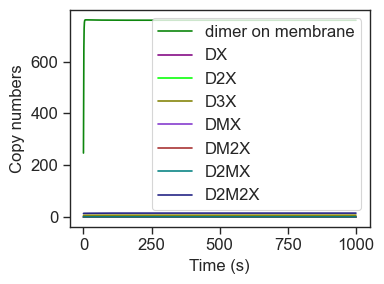

differential post and pre [-1.95291716e+03 -1.96678863e+03  9.32055572e+02  5.12388558e+02
 -1.47187438e+00 -6.93443405e+00 -1.06107676e-03 -1.21504924e-05
 -1.74214086e-03 -1.62836495e-03  2.59233445e-03 -2.59233413e-03
 -1.61166889e-10 -3.47796293e-03 -2.48569964e-02 -2.11229952e-01
  5.54977673e-01 -5.32810253e-02  5.89724192e-01 -9.79451320e-03
 -1.10638880e-01 -4.77234019e-01  1.22212960e+00]
ratio post and pre  [0.57938203 0.99272843 1.75351954 3.07488041 0.0129519  0.33566403
 0.02268214 0.00749366 0.06638628 0.04153307 1.00000022 0.57938182
 0.33566349 0.14290834 0.34135427 0.62009852 1.08992614 0.35126189
 1.0874998  0.18373372 0.35077129 0.61997343 1.08747378]
copies pre:  [4.64297134e+03 2.70476441e+05 1.23693616e+03 2.46948477e+02
 1.49118810e+00 1.04381434e+01 1.08570282e-03 1.22422315e-05
 1.86601893e-03 1.69892658e-03 1.15255909e+04 6.16315286e-03
 2.42598272e-10 4.05786581e-03 3.77395543e-02 5.56012453e-01
 6.17148331e+00 8.21302534e-02 6.73972025e+00 1.19991642e-02
 1.

In [10]:
#what is the total recruitment to the membrane and how does it change following dimer deletion?
solPost=model.simulate_post(test_candidate, sol)
model.test_mass_conservation(solPost)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)

#calculate the change in each final species pre and post
change=solPost[:,-1]-sol[:,-1]
ratio=solPost[:,-1]/sol[:,-1]
print("differential post and pre", change*model.cellVolume*602)
print("ratio post and pre ", ratio)
print("copies pre: ", sol[:,-1]*model.cellVolume*602)
print("copies post: ", solPost[:,-1]*model.cellVolume*602)

In [11]:
pclus, pclusMem, pmem, pMono, pDimer, pMX,pDX = model.calc_percentages_cluster(sol)
copiesT= sol*model.cellVolume*602
print("starting copies")
print(copiesT[:,0])
print("final copies")
copies=copiesT[:,-1]
print(copies)
XTot=copies[4]+copies[6]+copies[7]+copies[8]+copies[9]+\
                  copies[13]+copies[14]+copies[15]+copies[16]+copies[17]+\
                  copies[18]+copies[19]+copies[20]+copies[21]+copies[22]
print("X at the end: ", XTot)
QTot = copies[10]+copies[11]+2*copies[12]
print("Q at the end: ", QTot)
memMunc=model.calculate_munc13_on_membrane(copies)
muncFinal=memMunc+copies[0]+2*copies[5]
print("munc13 at end: ", muncFinal)
Rtot=copies[1]+memMunc-copies[11]-2*copies[12]-copies[7]
print("R at end: ", Rtot)         
print("percent on mem in cluster", pclusMem*100)
print("percent on membrane ", pmem*100)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)

print("RESULT POST STIMULATION: ")
pclus, pclusMem, pmem, pMono, pDimer, pMX,pDX = model.calc_percentages_cluster(solPost)
copiesT= solPost*model.cellVolume*602
print(copiesT[:,-1])
print("percent on mem in cluster", pclusMem*100)
print("percent on membrane ", pmem*100)
D_wt = model.calculate_population_average_diffusion(solPost)
print("POST STIM average populations diffusivity: ", D_wt)

starting copies
[6.56625898e+03 2.72378847e+05 0.00000000e+00 0.00000000e+00
 3.04965832e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.15255971e+04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
final copies
[4.64297134e+03 2.70476441e+05 1.23693616e+03 2.46948477e+02
 1.49118810e+00 1.04381434e+01 1.08570282e-03 1.22422315e-05
 1.86601893e-03 1.69892658e-03 1.15255909e+04 6.16315286e-03
 2.42598272e-10 4.05786581e-03 3.77395543e-02 5.56012453e-01
 6.17148331e+00 8.21302534e-02 6.73972025e+00 1.19991642e-02
 1.70415878e-01 1.25579120e+00 1.39713823e+01]
X at the end:  30.496583189940612
Q at the end:  11525.59710992
munc13 at end:  6566.258979577389
R at end:  272378.8465813625
percent on mem in cluster 8.478477313769627
percent on membrane  28.972530009973234
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395

In [12]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.
density = model.calculate_cluster_density(sol)
print("dimensions of density array: ",density.shape)
print("length of density array : ", len(density))
L=copies.shape[1]
print(L)
n75=np.int64(L*0.75)
#look at change in copy numbers over the final 75%. >0 means increasing
print(copies.shape)
delta = copies[:,-1]-copies[:,n75]
mx=copies[5]
x=copies[4]
print("75% mx ", mx[n75])
print("final mx: ", mx[-1])
print("75percent  x ", x[n75])
print("final X: ", x[-1])
print("initial total Munc ", copies[0][0])
print("initial total R ", copies[1][0])
print("initial total X ", copies[4][0])
print("initial total Q ", copies[10][0])
print("concentration of Munc in uM: ", copies[0][0]/(model.cellVolume*602))
print("binding of M to X, and dGMX: ", test_candidate[4], test_candidate[5],np.log(test_candidate[5]*1e-6/test_candidate[4]))
print("binding of M to cluster, and dGC: ", test_candidate[6], test_candidate[7], np.log(test_candidate[7]*1e-6/test_candidate[6]))

print("binding of S to R, dGSR: ", test_candidate[0], test_candidate[1], np.log(test_candidate[1]*1e-6/test_candidate[0]))
print("binding of S to Q, and dGQ (kT)", test_candidate[8], test_candidate[9], np.log(test_candidate[9]*1e-6/test_candidate[8]))

print(" dimerization, dGMM ", test_candidate[2], test_candidate[3], np.log(test_candidate[3]*1e-6/test_candidate[2]))
print(" dimer loop dG: eDF, eLoop, Sd ", test_candidate[11], test_candidate[10], test_candidate[13])
print(" convert from monomers to dimer in cluster ", test_candidate[12])
print("Stimulation increase factor: ", test_candidate[14])
print(delta.shape)
print(delta)

dimensions of density array:  (2001,)
length of density array :  2001
2001
(23, 2001)
75% mx  10.461980943833366
final mx:  10.438143353990197
75percent  x  2.817390858778097
final X:  1.4911880952614198
initial total Munc  6566.2589822144
initial total R  272378.84658400004
initial total X  30.4965831896
initial total Q  11525.59710992
concentration of Munc in uM:  0.00260527236
binding of M to X, and dGMX:  1.68840656 378.56905 -8.402897291331813
binding of M to cluster, and dGC:  5.53016071 0.0588041239 -18.359270726742174
binding of S to R, dGSR:  6.1484415 2.47671746 -14.724775114434065
binding of S to Q, and dGQ (kT) 0.00143764837 4.95272629 -5.670825790636932
 dimerization, dGMM  1.11625578 0.914658895 -14.014694664771636
 dimer loop dG: eDF, eLoop, Sd  0.0269006663 1.38241318 0.12392262
 convert from monomers to dimer in cluster  0.534503527
Stimulation increase factor:  3.04868969
(23,)
[-5.27926316e+00 -5.32695627e+00 -1.42367651e+00 -5.61530654e-01
 -1.32620276e+00 -2.383758

CHI PRE STIMULATION
Cluster density chi: Simulated 0.011870714710884132, Experimental 0.024375, Chi -1.3158261193770373
Small cluster density chi: Simulated 0.0010545169768402386, high density 0.011870714710884132, Chi 0
Percent of mem munc13 in clusters: 6.131932105827946%. Percent munc13 on the membrane: 22.217869522641784%. Monomer mem: 93.4195785608879%. Dimer mem: 0.0%
Percent of memMunc in MX 0.0007827113926749761%, Percent in DX 0.0%
Change in density over last 25%: 0.0021660399334668904, associated chi: -0.07954044413574707
Cluster lifetimes: tau46 192.51347431485092, tau56 12.202111950335787
**CHI POST STIMULATION
Cluster density chi: Simulated 0.02298728089188942, Experimental 0.04125, Chi -0.980060706620378
Small cluster density chi: Simulated 0.0009222864002009303, high density 0.02298728089188942, Chi 0
Percent of mem munc13 in clusters: 5.7077162847540475%. Percent munc13 on the membrane: 46.22193337343125%. Monomer mem: 94.10254732225324%. Dimer mem: 0.0%
Percent of memM

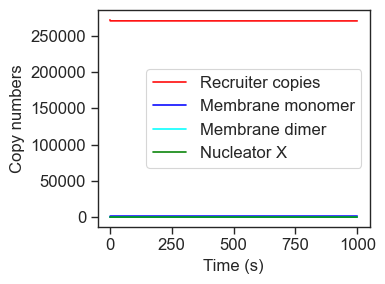

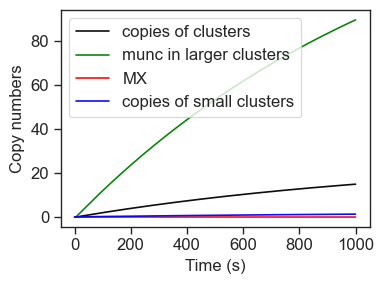

<Figure size 640x480 with 0 Axes>

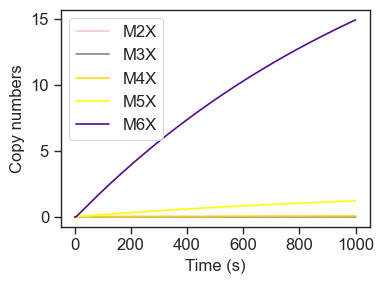

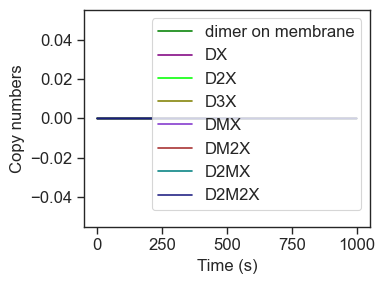

In [13]:
# Now evaluate the mutants, which will require new simulations
#first is the mutant C2A, which eliminates dimerization.
candidate_dc2a=list(test_candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mutantC2A_pre = model.simulate_pre(candidate_dc2a)

fit = model.fitness_function_to_call(candidate_dc2a)
model.plot_freespecies_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)

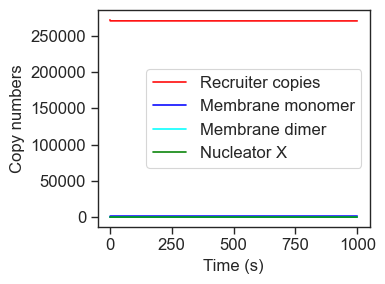

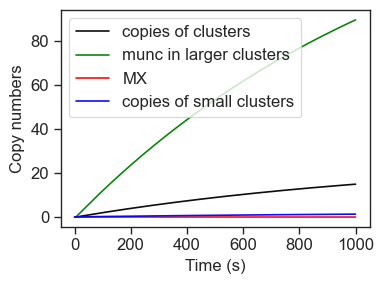

<Figure size 640x480 with 0 Axes>

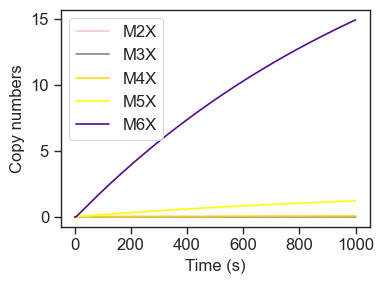

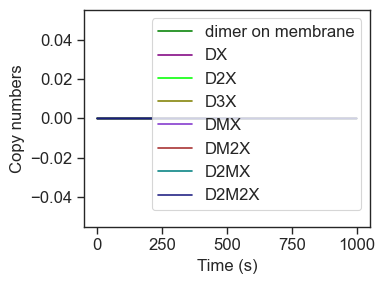

In [14]:
mutantC2A_post = model.simulate_pre(candidate_dc2a)


model.plot_freespecies_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)

CALCULATE DIFFUSIVITY OF WT AND MUTAN

In [15]:
print("percent on mem in cluster", pclusMem*100)
print("percent on membrane ", pmem*100)
print("percent in monomers on mem: ", pMono*100)
print("percent in dimers on membrane: ", pDimer*100)
pclus, pclusMem, pmem, pMono,pDimer, pMX, pDX = model.calc_percentages_cluster(mutantC2A_pre)
print("MUTANT percent on mem in cluster", pclusMem*100)
print("MUTANT percent on membrane ", pmem*100)
print("MUTANT percent in monomers on mem: ", pMono*100)
print("MUTANT percent in dimers on membrane: ", pDimer*100)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)
D_mutant = model.calculate_population_average_diffusion(mutantC2A_pre)
print("MUTANT average populations diffusivity: ", D_mutant)

percent on mem in cluster 4.535734070603181
percent on membrane  58.92544584779772
percent in monomers on mem:  56.05801647660843
percent in dimers on membrane:  39.250364388984416
MUTANT percent on mem in cluster 6.131932105827946
MUTANT percent on membrane  22.217869522641784
MUTANT percent in monomers on mem:  93.4195785608879
MUTANT percent in dimers on membrane:  0.0
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 1902.4113533906213. M 1236.9361614052464. D 246.94847694296482. 
average populations diffusivity:  0.062484376904948
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 1458.8828531907573. M 1362.8754335279098. D 0.0. 
MUTANT average populations diffusivity:  0.07479692567218187


[0.00260527 0.00215783 0.00203429 ... 0.00184218 0.00184218 0.00184218]
[6.1484415, 2.47671746, 1.11625578, 0.914658895, 1.68840656, 378.56905, 5.53016071, 0.0588041239, 0.00143764837, 4.95272629, 1.38241318, 0.0269006663, 0.534503527, 0.12392262, 3.04868969, 0.00260527236, 216.862139, 0.0242807191, 9.17643082]
CHI PRE STIMULATION
Cluster density chi: Simulated 0.021403332671417405, Experimental 0.024375, Chi -0.07431579612793876
Small cluster density chi: Simulated 0.001686422268168319, high density 0.021403332671417405, Chi 0
Percent of mem munc13 in clusters: 8.478477313769627%. Percent munc13 on the membrane: 28.972530009973234%. Monomer mem: 65.01970892643854%. Dimer mem: 25.961627752386697%
Percent of memMunc in MX 5.706982449580413e-05%, Percent in DX 8.930385004217537e-05%
Change in density over last 25%: 0.0009836877655129174, associated chi: -0.016381184512700923
Cluster lifetimes: tau46 89.12349911514904, tau56 14.537048859393128
**CHI POST STIMULATION
Cluster density chi: S

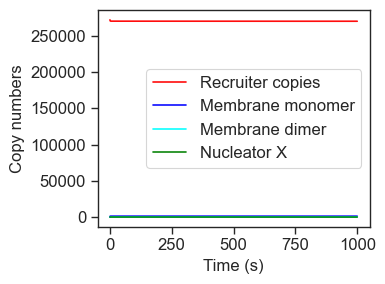

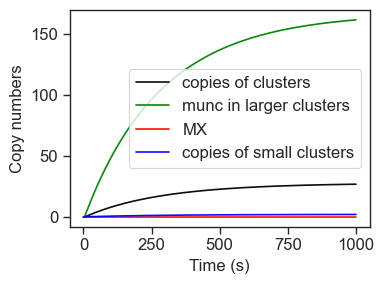

<Figure size 640x480 with 0 Axes>

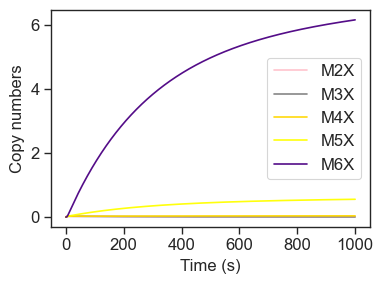

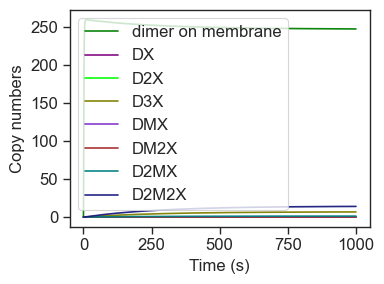

In [16]:
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)

In [17]:
#check what happents to the WT when ksr is lowered 
pip_candidate = list(test_candidate)
pip_candidate[0]=test_candidate[0]*0.01
#[ 4.96837050e+00  3.55095404e-02  3.26229677e-03  2.50912413e-03
#  8.07949209e-15  1.04750784e-16  4.80498959e-16  5.47005971e-16
#  2.20774808e-08  3.90765317e-21  2.48683319e-13  5.08853104e-23
##  3.23879314e-15  2.90078902e-22  1.84998305e-14  8.14878120e-06
 #-2.29054119e-23  2.46609799e-17 -2.41364978e-25  2.99265062e-19
 # 8.55263608e-11  2.56303563e-14  1.11713300e-05]
pipSol=model.simulate_pre(pip_candidate)
print(pipSol[:,-1])
#pipPost=model.simulate_post(pip_candidate, pipSol)
fit=model.fitness_function_to_call(pip_candidate)

[2.58203022e-03 1.08063867e-01 6.92676583e-06 1.95217570e-08
 1.20997482e-05 8.13630251e-06 1.24596909e-10 1.39337984e-10
 8.01774210e-12 2.85757583e-12 4.57296874e-03 3.42742461e-09
 1.89098444e-16 1.74364479e-12 3.80925642e-13 8.46498981e-14
 1.37646095e-14 6.79814349e-14 1.16497034e-15 6.25676780e-13
 1.40932165e-13 1.50209464e-14 2.41232342e-15]
CHI PRE STIMULATION
Cluster density chi: Simulated 3.479941914719264e-11, Experimental 0.024375, Chi -4.999999985723315
Small cluster density chi: Simulated 6.13805552426133e-09, high density 3.479941914719264e-11, Chi -6.13457558234661e-08
Percent of mem munc13 in clusters: 1.4929468949899482e-06%. Percent munc13 on the membrane: 0.26751646502192605%. Monomer mem: 99.43555368345882%. Dimer mem: 0.560202771434029%
Percent of memMunc in MX 0.0017877369671318822%, Percent in DX 4.1000968444733126e-05%
Change in density over last 25%: -2.146107568813986e-11, associated chi: -4.614596205310248e-17
Cluster lifetimes: tau46 17.410778078295333, ta

In [18]:
#check what happens to the WT when R is lowered. 
rec_candidate=list(test_candidate)
rec_candidate[15]=test_candidate[15]*0.01
recSol=model.simulate_pre(rec_candidate)
recPost=model.simulate_post(rec_candidate, recSol)
fit=model.fitness_function_to_call(rec_candidate)

CHI PRE STIMULATION
Cluster density chi: Simulated 8.57544675190203e-12, Experimental 0.024375, Chi -4.999999996481868
Small cluster density chi: Simulated 2.9176134845146492e-09, high density 8.57544675190203e-12, Chi -2.916755939839459e-08
Percent of mem munc13 in clusters: 4.6365552840784524e-07%. Percent munc13 on the membrane: 21.226783683965152%. Monomer mem: 99.55191929924145%. Dimer mem: 0.4459367935032794%
Percent of memMunc in MX 0.0017907395102926857%, Percent in DX 3.2638366562481095e-05%
Change in density over last 25%: -5.064847122447397e-12, associated chi: -1.3398654701431046e-17
Cluster lifetimes: tau46 16.58948974650949, tau56 13.173229394207327
**CHI POST STIMULATION
Cluster density chi: Simulated 7.888534494384373e-10, Experimental 0.04125, Chi -4.999999808762802
Small cluster density chi: Simulated 3.496017630560669e-08, high density 7.888534494384373e-10, Chi -3.488129096066284e-07
Percent of mem munc13 in clusters: 2.0019696234061173e-05%. Percent munc13 on the m

In [19]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.

In [20]:
copies[:,-1]

array([4.64297134e+03, 2.70476441e+05, 1.23693616e+03, 2.46948477e+02,
       1.49118810e+00, 1.04381434e+01, 1.08570282e-03, 1.22422315e-05,
       1.86601893e-03, 1.69892658e-03, 1.15255909e+04, 6.16315286e-03,
       2.42598272e-10, 4.05786581e-03, 3.77395543e-02, 5.56012453e-01,
       6.17148331e+00, 8.21302534e-02, 6.73972025e+00, 1.19991642e-02,
       1.70415878e-01, 1.25579120e+00, 1.39713823e+01])

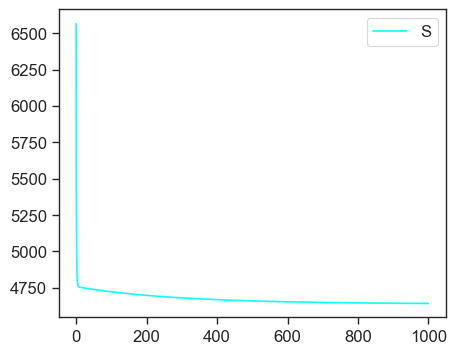

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[0], linestyle="-", label="S", color="cyan", alpha=0.95, zorder=3)
ax.legend()

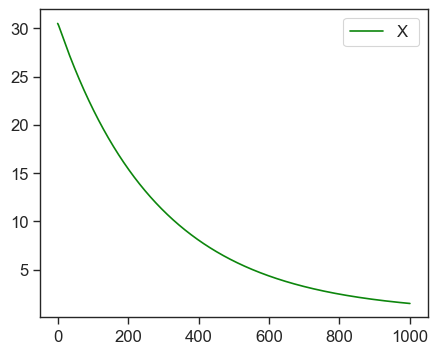

In [22]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[4], linestyle="-", label="X ", color="green", alpha=0.95, zorder=3)
ax.legend()

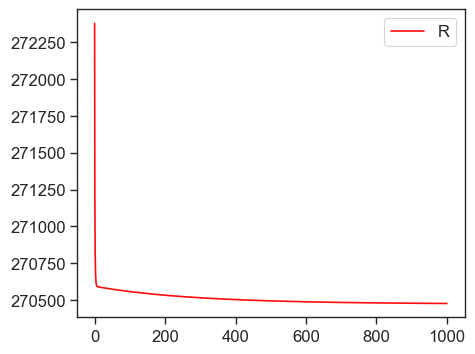

In [23]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[1], linestyle="-", label="R", color="red", alpha=0.95, zorder=3)
ax.legend() 

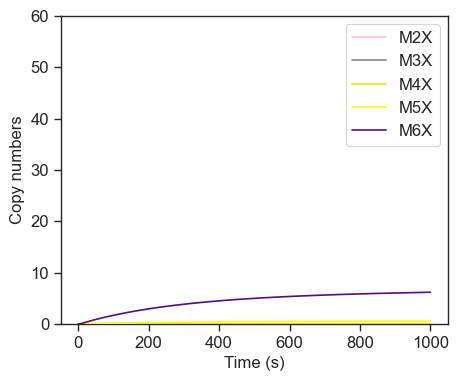

In [24]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
#ax.plot(model.timePoints, copies[5], linestyle="-", label="MX", color="cyan", alpha=0.95, zorder=3)
       # ax.plot(self.timePoints, copies[4], linestyle="-", label="X", color="blue", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[8], linestyle="-", label="M2X", color="pink", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[13], linestyle="-", label="M3X", color="gray", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[14], linestyle="-", label="M4X", color="gold", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[15], linestyle="-", label="M5X", color="yellow", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[16], linestyle="-", label="M6X", color="indigo", alpha=0.95, zorder=3)
             
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
#ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.legend()

final dimer copies:  246.94847694296482


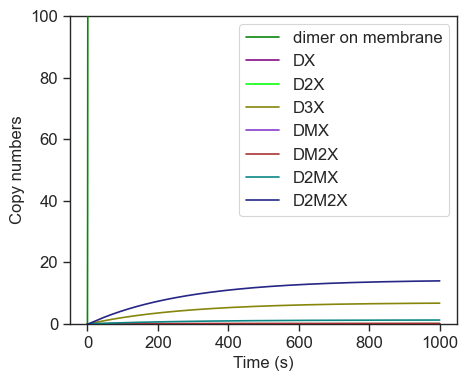

In [25]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(model.timePoints, copies[3], linestyle="-", label="dimer on membrane", color="green", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[3], linestyle="-", label="dimer on membrane", color="green", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[9], linestyle="-", label="DX", color="purple", alpha=0.95, zorder=3)     
ax.plot(model.timePoints, copies[17], linestyle="-", label="D2X", color="lime", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[18], linestyle="-", label="D3X", color="olive", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[19], linestyle="-", label="DMX", color=(0.5, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[20], linestyle="-", label="DM2X", color="brown", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[21], linestyle="-", label="D2MX", color="teal", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[22], linestyle="-", label="D2M2X", color=(0.1, 0.1, 0.5), alpha=0.95, zorder=3)
           
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
print("final dimer copies: ",copies[3,-1])
        #ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.legend()

Total solutions loaded: 66156
Using top 35% by Rank -> 23154 solutions.
Saved summary to: param_rangeFig.png


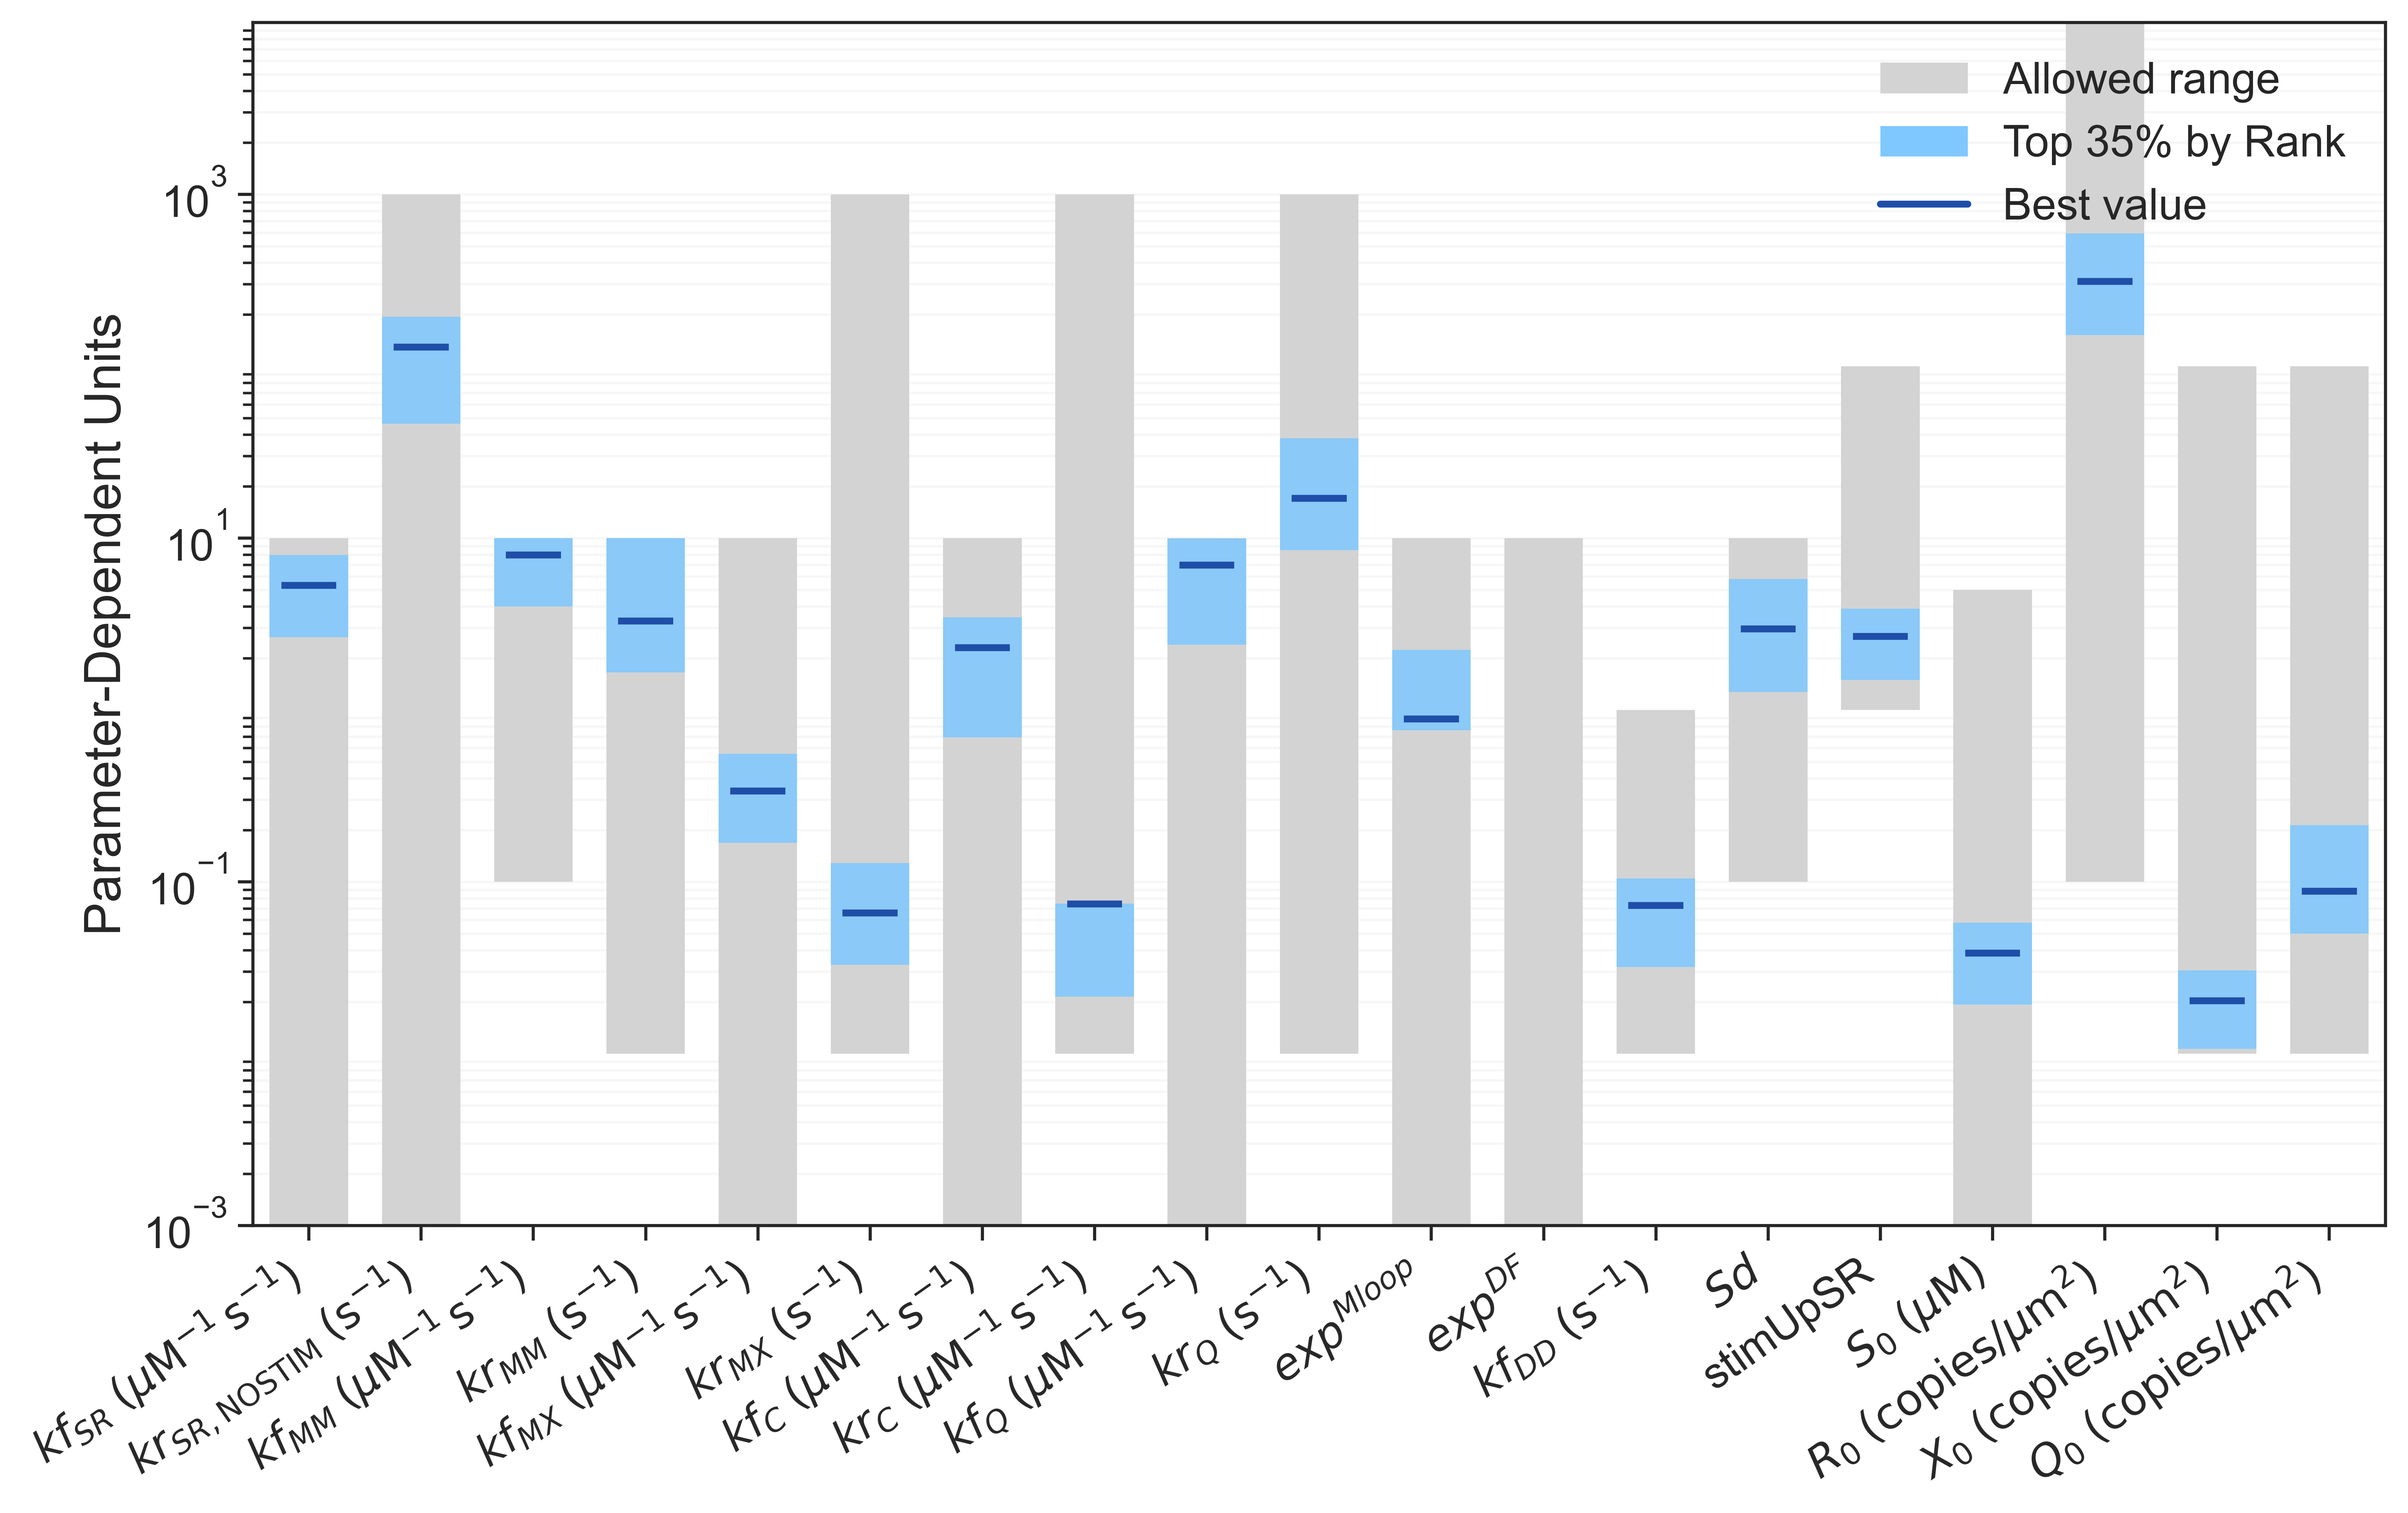

In [26]:

#create a plot of parameter ranges found
num=1109
fileName = f"../data/testParms_withQ_Lifetimes_{num}.txt"

#THIS COMMAND BELOW BREAKS THE MODEL DEFINITION.
model.plot_parameter_ranges_summary(percent=35, parameter_ranges = parameter_ranges, save_path="param_rangeFig.png",inputFile = fileName)


#best = 300
#totalTime = 10
#dt = 0.1
#model.filter_and_store_solutions(best=best, totalTime=totalTime, dt=dt)

START HERE TO PERFORM CLUSTERING

In [27]:
#read in all solutions in the output file.
import pandas as pd

num=1109
fileName = f"../data/testParms_withQ_Lifetimes_{num}.txt"

dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
#dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
print(dataF.loc[25])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)

log_param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness","Sd","stimUpSR"]]
print(log_param_cols)



(66156, 21)
Rank         25.000000
Fitness      -2.821100
kfsr          5.302300
krsr        129.430000
kfmm          7.990100
krmm          3.297000
kfmx          0.177810
krmx          0.097003
kfc           2.302500
krc           0.049766
kfq           4.789900
krq          17.014000
eLoop         1.480300
eDF           0.000270
kfdd          0.069858
Sd            2.545700
stimUpSR      2.672600
S0            0.038522
R0          302.430000
X0            0.020306
Q0            0.088069
Name: 25, dtype: float64
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'S0', 'R0', 'X0', 'Q0']


(-110.0, 10.0)

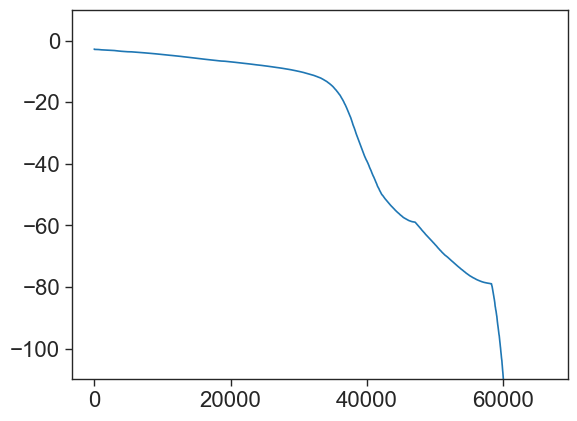

In [28]:
#plot the index vs the fitness for this dataset
plt.plot(dataF['Rank'], dataF['Fitness'])
plt.ylim([-110, 10])

In [29]:
#Only keep values of the dataset that have a fitness better than a threshold
fitness_threshold = -20
# Filter the DataFrame to only include rows with Fitness greater than the threshold
filtered_dataF = dataF[dataF['Fitness'] > fitness_threshold]
print(f"Number of rows with Fitness > {fitness_threshold}: {filtered_dataF.shape[0]}")
print(filtered_dataF.head())
#print(filtered_dataF.tail())

Number of rows with Fitness > -20: 36652
   Rank  Fitness    kfsr    krsr    kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43  7.9901  3.297  0.33726  0.065933  2.3025   
1     1  -2.7464  5.3023  129.43  7.9901  3.297  0.30008  0.065933  2.3025   
2     2  -2.7602  5.3023  129.43  7.9901  3.297  0.33726  0.065933  2.3025   
3     3  -2.7751  5.3023  129.43  7.9901  3.297  0.33726  0.041802  2.3025   
4     4  -2.7794  5.3023  129.43  7.9901  2.920  0.33726  0.065933  1.8826   

        krc  ...      krq    eLoop       eDF      kfdd      Sd  stimUpSR  \
0  0.074260  ...  17.0140  0.88565  0.000186  0.072905  2.9623    2.6726   
1  0.071201  ...   9.2834  0.76129  0.000148  0.069858  2.5457    2.6726   
2  0.068494  ...  17.0140  0.83528  0.000270  0.069858  2.5457    2.6726   
3  0.068083  ...  22.3380  0.84900  0.000270  0.069858  2.5457    2.6726   
4  0.049766  ...  15.1310  1.48030  0.000270  0.069858  2.5457    2.6726   

         S0      R0        X0    

In [30]:
#store the very best solution from each GA run.
selected_solutions = filtered_dataF.nlargest(1, 'Fitness').copy()
print(selected_solutions)

   Rank  Fitness    kfsr    krsr    kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43  7.9901  3.297  0.33726  0.065933  2.3025   

       krc  ...     krq    eLoop       eDF      kfdd      Sd  stimUpSR  \
0  0.07426  ...  17.014  0.88565  0.000186  0.072905  2.9623    2.6726   

         S0      R0        X0        Q0  
0  0.038522  311.83  0.020306  0.088069  

[1 rows x 21 columns]


In [31]:
#read in multiple datasets, filter for fitness threshold and concatenate before clustering.

fileNums=[8049, 7585, 9774, 9849, 4782, 9572, 8632, 4235, 6683, 3700]
for num in fileNums:
    fileName = f"../data/testParms_withQ_Lifetimes_{num}.txt"
    print("Read filename: ", fileName)
    dataF = pd.read_csv(fileName, sep=",", engine="python")
    dataF.columns = dataF.columns.str.strip()
    threshold_dataF = dataF[dataF['Fitness'] > fitness_threshold]
    print(f"Number of rows with Fitness > {fitness_threshold}: {filtered_dataF.shape[0]}")
    tempDF = pd.concat([filtered_dataF, threshold_dataF])
    filtered_dataF=tempDF
    top1 = threshold_dataF.nlargest(1, 'Fitness').copy()
    tempTop = pd.concat([selected_solutions, top1])
    selected_solutions=tempTop
print("size of new dataset: ", filtered_dataF.shape)


Read filename:  ../data/testParms_withQ_Lifetimes_8049.txt
Number of rows with Fitness > -20: 36652
Read filename:  ../data/testParms_withQ_Lifetimes_7585.txt
Number of rows with Fitness > -20: 72206
Read filename:  ../data/testParms_withQ_Lifetimes_9774.txt
Number of rows with Fitness > -20: 108838
Read filename:  ../data/testParms_withQ_Lifetimes_9849.txt
Number of rows with Fitness > -20: 124070
Read filename:  ../data/testParms_withQ_Lifetimes_4782.txt
Number of rows with Fitness > -20: 139112
Read filename:  ../data/testParms_withQ_Lifetimes_9572.txt
Number of rows with Fitness > -20: 154289
Read filename:  ../data/testParms_withQ_Lifetimes_8632.txt
Number of rows with Fitness > -20: 167861
Read filename:  ../data/testParms_withQ_Lifetimes_4235.txt
Number of rows with Fitness > -20: 182727
Read filename:  ../data/testParms_withQ_Lifetimes_6683.txt
Number of rows with Fitness > -20: 196905
Read filename:  ../data/testParms_withQ_Lifetimes_3700.txt
Number of rows with Fitness > -20:

In [32]:
print(filtered_dataF[0:10])

   Rank  Fitness    kfsr    krsr     kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
1     1  -2.7464  5.3023  129.43   7.9901  3.297  0.30008  0.065933  2.3025   
2     2  -2.7602  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
3     3  -2.7751  5.3023  129.43   7.9901  3.297  0.33726  0.041802  2.3025   
4     4  -2.7794  5.3023  129.43   7.9901  2.920  0.33726  0.065933  1.8826   
5     5  -2.7810  5.3023  129.43   7.9901  3.297  0.22255  0.065933  2.0847   
6     6  -2.7929  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.0171   
7     7  -2.7945  5.3023  129.43   7.9901  3.297  0.33726  0.046440  1.8226   
8     8  -2.7964  5.3023  129.43  10.0000  3.297  0.33726  0.065933  1.8083   
9     9  -2.7983  5.3023  129.43   7.9901  3.297  0.33726  0.065933  1.7486   

        krc  ...      krq    eLoop       eDF      kfdd      Sd  stimUpSR  \
0  0.074260  ...  17.0140  0.88565  0.000186  0.072905

In [33]:
print("top solutions: ", selected_solutions)

top solutions:     Rank  Fitness      kfsr        krsr     kfmm      krmm       kfmx  \
0     0  -2.7322  5.302300  129.430000  7.99010  3.297000   0.337260   
0     0  -1.9188  3.582700    0.026522  2.35320  1.400400   3.571300   
0     0  -2.2956  4.314000    0.053834  4.24870  0.533930   0.368030   
0     0  -1.8155  5.316000    2.789500  1.39110  0.650370   2.236500   
0     0  -2.1046  0.264540    0.029176  1.85980  0.753330   2.859800   
0     0 -11.0889  1.051800    1.223500  0.10000  1.389100   0.020685   
0     0  -2.6895  0.222060    0.008009  0.92095  0.182650  10.000000   
0     0  -1.5810  1.082100    0.130200  0.26591  0.035394   2.151700   
0     0 -12.9077  1.634700    8.246600  0.31039  0.011796   1.681300   
0     0 -11.8664  0.004703    0.018214  0.33804  1.229700   0.010781   
0     0  -4.0603  0.355750    0.078668  4.42540  1.833300   0.360280   

         krmx       kfc       krc  ...         krq     eLoop       eDF  \
0    0.065933   2.30250  0.074260  ...   17.0

(-25.0, -1.0)

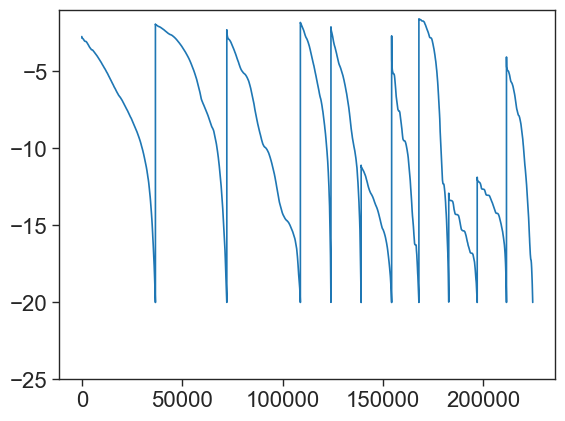

In [34]:
xVals = np.arange(0, filtered_dataF.shape[0])
plt.plot(xVals, filtered_dataF['Fitness'])
plt.ylim([-25, -1])

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import math

In [36]:


#cols = ['kfmm','krmm','kfc']   # example feature columns
X = filtered_dataF[param_cols].values
print(param_cols)
print(X.shape)
print(X[1,:])
logX = np.log10(X)
print(logX[1,:])
print(10 ** logX[1,:])

['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']
(224552, 19)
[5.3023e+00 1.2943e+02 7.9901e+00 3.2970e+00 3.0008e-01 6.5933e-02
 2.3025e+00 7.1201e-02 4.7899e+00 9.2834e+00 7.6129e-01 1.4806e-04
 6.9858e-02 2.5457e+00 2.6726e+00 3.8522e-02 3.0243e+02 2.0306e-02
 8.8069e-02]
[ 0.7244643   2.11203495  0.90255221  0.51811895 -0.52276295 -1.18089716
  0.36219964 -1.14751391  0.68032645  0.96770706 -0.11844987 -3.82956225
 -1.15578385  0.40580722  0.42693396 -1.41429117  2.48062487 -1.69237562
 -1.05517693]
[5.3023e+00 1.2943e+02 7.9901e+00 3.2970e+00 3.0008e-01 6.5933e-02
 2.3025e+00 7.1201e-02 4.7899e+00 9.2834e+00 7.6129e-01 1.4806e-04
 6.9858e-02 2.5457e+00 2.6726e+00 3.8522e-02 3.0243e+02 2.0306e-02
 8.8069e-02]


In [37]:
#perform clustering on the parameter sets
#first transform all data.
#Standard Scaler will evaluate the mean and variance, taking all values, subtracting means and dividing by variants.
#for all rates, they should be in log-transformed values.
scaler=StandardScaler()
Xs = scaler.fit_transform(logX)

In [38]:
nCluster = 30
kmeans = KMeans(n_clusters=nCluster, init='k-means++')

In [39]:
labels = kmeans.fit_predict(Xs)

In [40]:
centroids_scaled = kmeans.cluster_centers_             # in scaled space
centroids_original = scaler.inverse_transform(centroids_scaled)
#return the original values back to their non-log-transformed values.
centroid_10 = 10 ** centroids_original
print(centroids_original.shape)
print("first center, log10 ",centroids_original[1,:])
print("0 center, lin units ", centroid_10[0,:])
filtered_dataF['cluster'] = labels         # attach labels back to DataFrame
print("number of rows ", labels.shape)
print("labels for first 10 rows ", labels[1:10])
print(filtered_dataF[0:10])

(30, 19)
first center, log10  [ 0.6301665  -1.27385337  0.84853725 -0.27720055 -0.49655862 -0.92262755
 -0.0930166  -1.59998567 -1.74616128 -1.37357693  0.45562309 -3.29493389
 -0.87337136 -0.07289659  1.27205596 -2.57415589  0.54496922 -1.658991
  1.85192677]
0 center, lin units  [3.63516287e+00 2.62080487e-02 3.70731939e+00 1.27443933e+00
 5.35918999e+00 1.39598959e+02 9.46397238e+00 7.44635515e-02
 4.88165557e+00 1.82246163e+01 1.00532942e+00 9.16467552e+00
 9.34230318e-02 2.52614800e-01 6.74250657e+01 2.54870305e-03
 1.45095540e+00 2.41952842e-02 5.36766324e+01]
number of rows  (224552,)
labels for first 10 rows  [12 12 12 12 12 12 12 12 12]
   Rank  Fitness    kfsr    krsr     kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
1     1  -2.7464  5.3023  129.43   7.9901  3.297  0.30008  0.065933  2.3025   
2     2  -2.7602  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
3     3  -2.7751  5.3023  129.

In [41]:
#print(filtered_dataF[0:10])

In [42]:
# Find the size of each cluster (number of elements per cluster)
cluster_counts = filtered_dataF['cluster'].value_counts().sort_index()
#print("Cluster sizes:")
#print(cluster_counts)

# Example: count how many elements have a particular value, e.g., cluster label 16
label_to_check = 3
count_label = (filtered_dataF['cluster'] == label_to_check).sum()
print(f"Number of elements with cluster label {label_to_check}: {count_label}")

# Calculate the mean fitness of all elements in each cluster
mean_fitness_per_cluster = filtered_dataF.groupby('cluster')['Fitness'].mean().sort_index()
#print("Mean fitness per cluster:")
#print(mean_fitness_per_cluster)
print(mean_fitness_per_cluster[label_to_check])
#print(filtered_dataF.loc[1658])
#print(filtered_dataF.loc[1659])
sorted_fitness = mean_fitness_per_cluster.sort_values(ascending=False)
sorted_clusters = sorted_fitness.index.tolist()
print("Sorted mean fitness per cluster:")
print(sorted_fitness)
print("Order of clusters by mean fitness:", sorted_clusters)
sorted_size=cluster_counts.sort_values(ascending = False)
sorted_cluster_sizes = sorted_size.index.tolist()
print("Sorted cluster sizes")
print(sorted_size)
print("order of clusters by size:",sorted_cluster_sizes)

#find the indexes of all the elements in a specific cluster
indexes_in_cluster = filtered_dataF.index[filtered_dataF['cluster'] == label_to_check].tolist()
print(f"Indexes of elements in cluster {label_to_check}: (first 10)", indexes_in_cluster[0:10])


Number of elements with cluster label 3: 7337
-3.6962231293444185
Sorted mean fitness per cluster:
cluster
3     -3.696223
0     -4.316841
21    -4.437394
27    -5.087302
5     -5.598208
1     -5.896094
29    -5.912507
12    -6.274572
9     -6.915623
8     -7.011184
10    -7.195018
24    -8.448937
15    -8.810188
19    -8.828768
20    -9.029695
2     -9.629618
13    -9.712644
26   -10.099328
18   -10.690175
4    -13.161798
16   -13.379881
17   -13.726207
7    -14.249792
22   -14.249920
28   -14.708647
11   -14.743513
25   -15.218681
23   -15.697654
14   -15.822940
6    -15.884196
Name: Fitness, dtype: float64
Order of clusters by mean fitness: [3, 0, 21, 27, 5, 1, 29, 12, 9, 8, 10, 24, 15, 19, 20, 2, 13, 26, 18, 4, 16, 17, 7, 22, 28, 11, 25, 23, 14, 6]
Sorted cluster sizes
cluster
12    25460
1     16979
21    15061
11    10420
6     10273
13     9507
18     9227
0      9003
20     8480
19     7732
27     7687
16     7607
8      7543
24     7531
3      7337
5      7309
17     7008
15  

In [43]:
centroid_df = pd.DataFrame(centroid_10, columns=param_cols)
#assign the fitness based on the mean fitness.

centroid_df['Fitness']=mean_fitness_per_cluster
#now resort the clusters by fitness values
cols = centroid_df.columns.tolist()
cols = ['Fitness'] + [col for col in cols if col != 'Fitness']
centroid_df = centroid_df[cols]

sorted_centroid = centroid_df.sort_values(by='Fitness',ascending=False)
print(sorted_centroid[0:8])

     Fitness      kfsr        krsr      kfmm      krmm      kfmx        krmx  \
3  -3.696223  1.075713    0.128952  0.273326  0.035173  2.127655    0.052936   
0  -4.316841  3.635163    0.026208  3.707319  1.274439  5.359190  139.598959   
21 -4.437394  3.546825    0.026174  2.895763  1.272864  3.559948  139.562811   
27 -5.087302  5.324841    2.735819  1.337068  0.781530  1.901361  353.223345   
5  -5.598208  0.262346    0.028745  1.845059  0.926917  3.548405  165.317220   
1  -5.896094  4.267431    0.053229  7.055654  0.528201  0.318744    0.119501   
29 -5.912507  3.559596    0.026147  3.084574  1.269408  4.137192  140.211412   
12 -6.274572  5.237924  115.013955  7.860294  3.794620  0.343082    0.072777   

         kfc       krc       kfq        krq     eLoop       eDF      kfdd  \
3   7.460443  0.673156  0.018035   0.379059  0.102802  0.006856  0.424582   
0   9.463972  0.074464  4.881656  18.224616  1.005329  9.164676  0.093423   
21  9.480249  0.043477  5.953456  18.252199  1.2

In [44]:
print("Mean of each column in log10centroid_10:")
print(np.mean(np.log10(centroid_10), axis=0))
print("Std of each column in centroid_10:")
print(np.std(np.log10(centroid_10), axis=0))


Mean of each column in log10centroid_10:
[-0.06510109 -0.71724829  0.10325279 -0.15054747 -0.26452699  0.44409635
  0.38005796 -0.96227621 -0.7545405   0.32194502 -0.09089913 -1.33558573
 -0.62194834 -0.03943208  1.01732493 -1.49472158  1.28392649 -1.65815263
  0.05643066]
Std of each column in centroid_10:
[0.86992949 1.24857951 0.58792242 0.73610757 0.95816832 1.58626659
 0.54870034 0.49397521 1.35316114 1.29080198 0.43097614 1.50391555
 0.43430707 0.44262642 0.57829376 0.96759858 0.90139534 0.16000347
 1.33490083]


In [45]:
logData = filtered_dataF
#print(filtered_dataF.head())

In [46]:
logData[log_param_cols]=np.log10(logData[log_param_cols])

In [47]:
#look at the mean and variance of each parameter in the clusters. use the log-transformed values
#print(logData.head())
mean_krsr_per_cluster = logData.groupby('cluster')['krsr'].mean().sort_index()
std_krsr_per_cluster = logData.groupby('cluster')['krsr'].std().sort_index()
print("<krsr>: ", mean_krsr_per_cluster)
print("std(krsr)", std_krsr_per_cluster)
mean_per_cluster = logData.groupby('cluster')[log_param_cols].mean().sort_index()
print("Mean per cluster for all parameters:")
print(mean_per_cluster)

# Compute the std of all columns grouped by cluster
std_per_cluster = logData.groupby('cluster')[log_param_cols].std().sort_index()
print("Std per cluster for all parameters:")
print(std_per_cluster)

<krsr>:  cluster
0    -1.581565
1    -1.273853
2     2.029005
3    -0.889571
4    -1.742857
5    -1.541437
6     0.911167
7    -0.056081
8     0.396998
9    -1.111630
10   -2.113281
11   -1.234224
12    2.060751
13   -1.577997
14   -2.113388
15   -1.177681
16   -0.055646
17   -1.744190
18   -1.316534
19   -1.539987
20    1.961881
21   -1.582124
22    0.911433
23    0.043119
24   -0.941738
25   -1.236221
26   -2.113941
27    0.437087
28   -1.742377
29   -1.582572
Name: krsr, dtype: float64
std(krsr) cluster
0     0.068952
1     0.067737
2     0.120736
3     0.084182
4     0.061321
5     0.068525
6     0.054323
7     0.070117
8     0.085757
9     0.059875
10    0.058129
11    0.076977
12    0.097538
13    0.062832
14    0.070676
15    0.087130
16    0.078039
17    0.055513
18    0.076256
19    0.065850
20    0.067253
21    0.066508
22    0.077913
23    0.071847
24    0.080741
25    0.082240
26    0.055502
27    0.067823
28    0.062396
29    0.066562
Name: krsr, dtype: float64
Mean per cl

In [48]:
#look for gaps in the assignments, indicating that they are not sorting by fitness.

nonconsecutive = [i for i in range(1, len(indexes_in_cluster)) if indexes_in_cluster[i] != indexes_in_cluster[i-1] + 1]
if nonconsecutive:
    print("Nonconsecutive index positions (gaps between elements):")
    for i in nonconsecutive:
        print(f"Gap between {indexes_in_cluster[i-1]} and {indexes_in_cluster[i]}")
else:
    print("All indexes are consecutive.")

Nonconsecutive index positions (gaps between elements):
Gap between 36601 and 34204
Gap between 34204 and 34265
Gap between 34265 and 35018
Gap between 35018 and 35426
Gap between 35426 and 14626
Gap between 14626 and 12740
Gap between 12740 and 13540
Gap between 13540 and 0
Gap between 2392 and 2394
Gap between 2415 and 2417
Gap between 2471 and 2473
Gap between 2519 and 2521
Gap between 2552 and 2554
Gap between 2607 and 2609
Gap between 2628 and 2630
Gap between 2634 and 2636
Gap between 2638 and 2640
Gap between 2669 and 2671
Gap between 2684 and 2686
Gap between 2687 and 2689
Gap between 2816 and 2818
Gap between 2853 and 2855
Gap between 2900 and 2902
Gap between 2926 and 2928
Gap between 2973 and 2975
Gap between 2979 and 2981
Gap between 2989 and 2991
Gap between 3001 and 3003
Gap between 3007 and 3009
Gap between 3011 and 3013
Gap between 3013 and 3015
Gap between 3015 and 3019
Gap between 3020 and 3022
Gap between 3024 and 3026
Gap between 3028 and 3030
Gap between 3031 and 3

In [49]:



# overall mean silhouette
#mean_sil = silhouette_score(Xs, labels)
#print("Mean silhouette:", mean_sil)

# per-sample silhouette values (useful for plotting / diagnostics)
#sample_sil = silhouette_samples(Xs, labels)  # array length = n_samples


In [50]:
#sample_sil = silhouette_samples(Xs, labels)  # array length = n_samples

In [51]:
#print(sample_sil[0:10])

PERFORM CROSS VALIDATION ON THE BEST SOLUTIONS
AND ON THE CLUSTER CENTROIDS.

In [52]:
#The clustered centroids in regular units: sorted_centroid
#the best solutions in regular units: selected_solutions
#print(selected_solutions)
#for each solution, evaluate each metric, and the error between the simulation and experiment.
#be sure to include the diffusion estimates. 
just_parms=selected_solutions[param_cols]
candidate=just_parms.iloc[0].values
print(candidate)
colWT = ['tau56','tau56Post', 'densPre','densPost','stimFact','percClust','percCPost','percDimer','percDPost','SSval','SSvalPost']
colC2A = ['C2Atau56','C2Atau56Post', 'C2AdensPre','C2AdensPost','C2AstimFact','C2ApercClust','C2ApercCPost','C2ApercDimer','C2ApercDPost','C2ASSval','C2ASSvalPost']

colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
print(len(metricsWT))
exp_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_metrics = pd.DataFrame([metricsD], columns = colD)

#compute tau56, densPre, denPost, stim, diffusion, percent in cluster, SS, dimer.
#same after mutation.
#add new rows:
#df.loc[len(df)] = new_row

print(exp_metrics)
print(C2A_metrics)
print(D_metrics)
print(len(just_parms))

[5.3023e+00 1.2943e+02 7.9901e+00 3.2970e+00 3.3726e-01 6.5933e-02
 2.3025e+00 7.4260e-02 6.9451e+00 1.7014e+01 8.8565e-01 1.8642e-04
 7.2905e-02 2.9623e+00 2.6726e+00 3.8522e-02 3.1183e+02 2.0306e-02
 8.8069e-02]
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 859.8879165442507. M 527.1439890003318. D 89.14996779101392. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 2749.532947956005. M 1377.784437722886. D 608.6467466170227. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 749.6306997837288. M 612.1381340808952. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 1765.1

In [53]:
print(len(just_parms))
print(just_parms.iloc[10])

11
kfsr         0.355750
krsr         0.078668
kfmm         4.425400
krmm         1.833300
kfmx         0.360280
krmx        96.103000
kfc          4.316900
krc          0.044058
kfq          2.856100
krq          0.021062
eLoop        1.189100
eDF          1.316000
kfdd         0.893630
Sd           0.810180
stimUpSR     2.315300
S0           0.008092
R0          22.921000
X0           0.038066
Q0           0.040124
Name: 0, dtype: float64


In [54]:
#iterate over all other solutions in the just_parms array
for i in np.arange(1,len(just_parms)):
    candidate=just_parms.iloc[i].values
    print(candidate)
    [metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
    exp_metrics.loc[len(exp_metrics)] = metricsWT
    C2A_metrics.loc[len(C2A_metrics)] = metricsC2A
    D_metrics.loc[len(D_metrics)] = metricsD

print(exp_metrics)
print(D_metrics)

[3.5827e+00 2.6522e-02 2.3532e+00 1.4004e+00 3.5713e+00 2.0272e+02
 1.0000e+01 3.0454e-02 6.0471e+00 1.8467e+01 1.6580e+00 9.4832e+00
 9.4320e-02 2.5469e-01 5.4903e+01 2.5754e-03 1.7202e+00 2.3255e-02
 5.4353e+01]
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 755.0761207308672. M 444.2249112409711. D 43.855732423108854. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 2103.8392520892917. M 1224.4467216867508. D 333.19647060822143. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 633.9393044664303. M 493.868030316066. D -2.2597255703422237e-32. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.0009756097

In [55]:
print(C2A_metrics)
#print(just_parms.iloc[10].values)
print(selected_solutions.iloc[9].values)

     C2Atau56  C2Atau56Post  C2AdensPre  C2AdensPost  C2AstimFact  \
0   15.204879     15.204878    0.012642     0.017541     2.354706   
1   19.538875     19.804750    0.010936     0.022777     3.247074   
2   16.412989     16.412987    0.011953     0.018792     3.256495   
3   12.262680     12.369042    0.010516     0.023881     2.796104   
4   17.714823     17.931647    0.011014     0.022280     3.264930   
5    7.669632      7.683947    0.010617     0.021240     2.803602   
6    8.410624      8.410784    0.009851     0.021317     2.456377   
7   19.397235     19.397240    0.011284     0.021864     3.090695   
8   12.875093     12.875093    0.016967     0.017021     2.765962   
9   15.268260     15.269385    0.015743     0.016266     3.123921   
10  18.763896     18.943982    0.007226     0.026543     2.133915   

    C2ApercClust  C2ApercCPost  C2ApercDimer  C2ApercDPost      C2ASSval  \
0       0.127091      0.074888  0.000000e+00  0.000000e+00  1.602743e-08   
1       0.129999   

In [56]:
#save data to files. Include the fitness values.
unique_id=1002
selected_solutions.to_csv(f"Top11_solutions_withQ_parameters_{unique_id}.csv", index=False)
exp_metrics.to_csv(f"Top11_solutions_withQ_WT_{unique_id}.csv")
C2A_metrics.to_csv(f"Top11_solutions_withQ_C2A_{unique_id}.csv")
D_metrics.to_csv(f"Top11_solutions_withQ_Diffusion_{unique_id}.csv")

GENERATE PLOTS BASED ON A SPECIFIC CANDIDATE


In [57]:
whichRow=5
print('Fitness: ', selected_solutions['Fitness'].iloc[whichRow] )
candidate=selected_solutions[param_cols].iloc[whichRow].values
sol, solPost=model.simulate(candidate)
print(candidate)

Fitness:  -11.0889
[1.0518e+00 1.2235e+00 1.0000e-01 1.3891e+00 2.0685e-02 2.5451e+01
 1.3882e-01 2.1241e-01 4.7105e+00 3.3980e-01 6.1269e-01 5.6603e-03
 1.4488e-01 4.9998e-01 4.3972e+00 1.2184e-01 3.2634e+02 2.3015e-02
 8.1750e-02]


In [58]:
print(D_metrics.iloc[whichRow])
print(exp_metrics.iloc[whichRow])
print(C2A_metrics.iloc[whichRow])

D           0.064906
Dpost       0.057891
C2AD        0.079776
C2ADpost    0.079862
Name: 5, dtype: float64
tau56        1.399280e+01
tau56Post    1.399602e+01
densPre      2.237108e-02
densPost     2.286387e-02
stimFact     2.887547e+00
percClust    3.382301e-03
percCPost    1.197142e-03
percDimer    3.705493e-01
percDPost    5.503453e-01
SSval        1.292610e-06
SSvalPost    6.599796e-08
Name: 5, dtype: float64
C2Atau56        7.669632e+00
C2Atau56Post    7.683947e+00
C2AdensPre      1.061668e-02
C2AdensPost     2.124039e-02
C2AstimFact     2.803602e+00
C2ApercClust    2.288269e-03
C2ApercCPost    1.632919e-03
C2ApercDimer    0.000000e+00
C2ApercDPost    0.000000e+00
C2ASSval        8.838613e-04
C2ASSvalPost   -8.735936e-07
Name: 5, dtype: float64


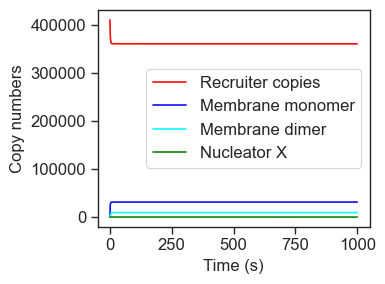

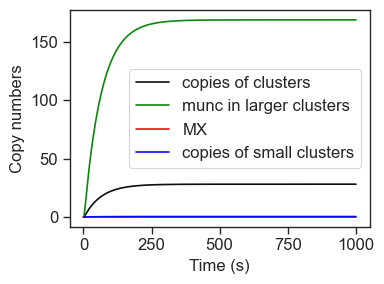

<Figure size 640x480 with 0 Axes>

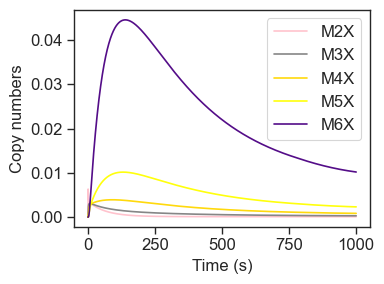

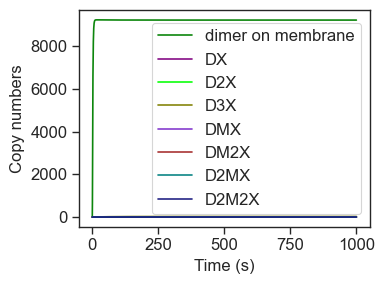

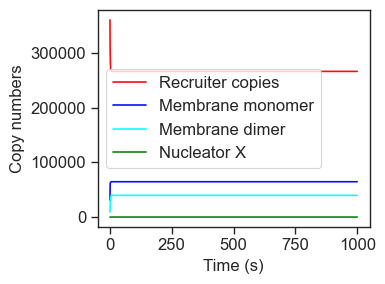

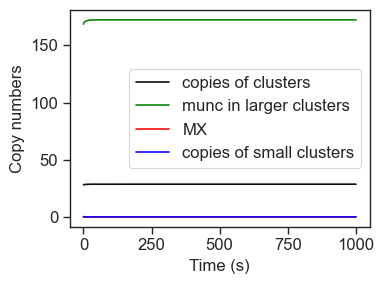

<Figure size 640x480 with 0 Axes>

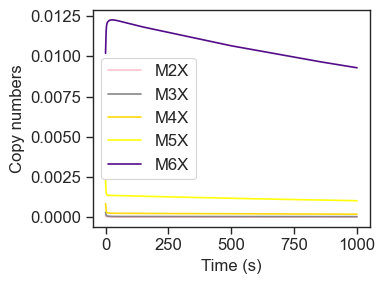

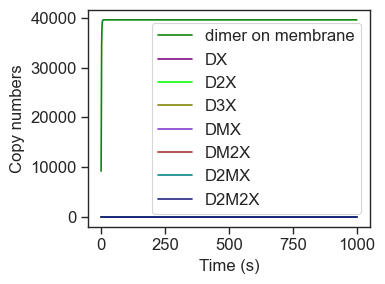

In [59]:
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
#m
#m

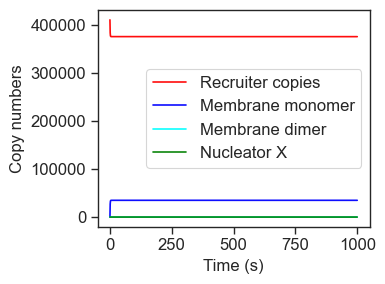

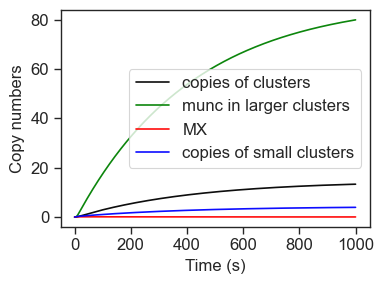

<Figure size 640x480 with 0 Axes>

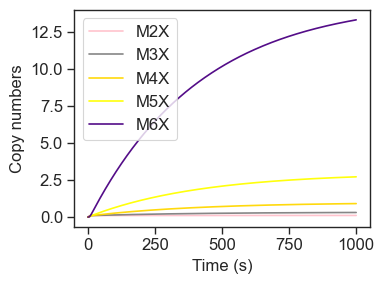

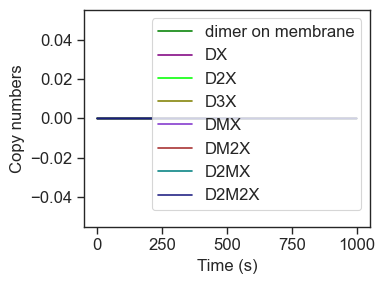

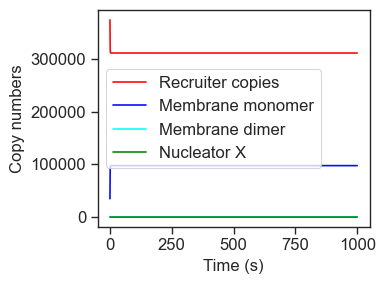

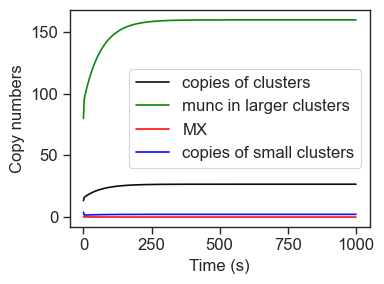

<Figure size 640x480 with 0 Axes>

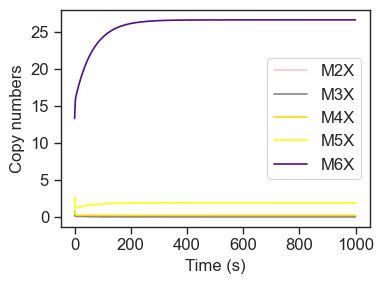

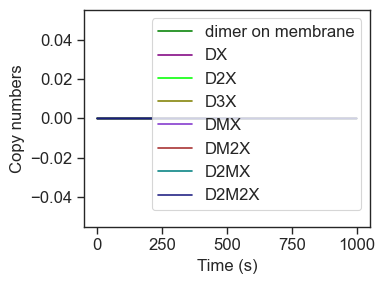

In [60]:
candidate_dc2a=list(candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mut, mutPost = model.simulate(candidate_dc2a)
       
model.plot_freespecies_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
#m
model.plot_freespecies_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
#m

In [61]:
print(model.timePoints[1])

0.5


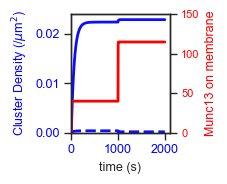

In [62]:
#create quality small figure of time-dependence of clusters
fig, ax = plt.subplots(figsize=(2.5, 2))  # 2 inches wide, 2 inches tall

copies = sol * model.cellVolume * 602
clusters = copies[22] + copies[18] + copies[16]
small_clusters = copies[21] + copies[20] + copies[19] + copies[17] + copies[15] + copies[14] + copies[13]
copiesP = solPost * model.cellVolume * 602
clustersP = copiesP[22] + copiesP[18] + copiesP[16]
small_clustersP = copiesP[21] + copiesP[20] + copiesP[19] + copiesP[17] + copiesP[15] + copiesP[14] + copiesP[13]

# ensure timePoints is a numpy array so adding a scalar works reliably
tp = np.asarray(model.timePoints)
fullTime = np.concatenate((tp, tp + tp[-1]))

# concatenate pre/post series
combine = np.concatenate((clusters, clustersP))
small_combine = np.concatenate((small_clusters, small_clustersP))

ax.plot(fullTime, combine / model.cellArea, linewidth=2,linestyle="-", label="clusters", color='blue', alpha=0.95, zorder=3)
ax.plot(fullTime, small_combine / model.cellArea, linewidth=2, linestyle="--", label="small clusters", color='blue', alpha=0.95, zorder=3)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel("time (s)", fontsize=9)
ax.set_ylabel("Cluster Density (/$\\mu$m$^2$)", color='blue',fontsize=9)
ax.tick_params(axis='both',labelcolor='blue', labelsize=9)
ax.set_xticks([0, 1000,2000])

#now add the monomer density on the membrane, on the right axis
# Second line (right y-axis)
ax2 = ax.twinx()
memCopies=model.calculate_munc13_on_membrane(copies)
memCopiesPost=model.calculate_munc13_on_membrane(copiesP)
     
combineMem = np.concatenate((memCopies, memCopiesPost))

ax2.plot(fullTime, combineMem/model.cellArea, color='red', linewidth=2)
ax2.set_ylabel("Munc13 on membrane", fontsize=9, color='red')
ax2.tick_params( labelcolor='red', labelsize=8)
ax2.set_ylim(bottom=0, top=150)

plt.tight_layout()
plt.savefig("/Users/margaret/Dropbox/r2025/Munc13/IMAGES/clusterDensity_vs_time.png",dpi=300)
plt.show()


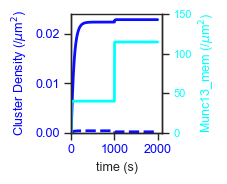

In [63]:
model.plot_time_resolved_density(sol, solPost,'WT')

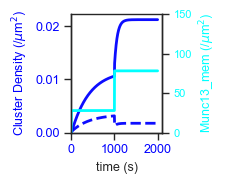

In [64]:
#Plot the same thing for the C2A mutant.
model.plot_time_resolved_density(mut, mutPost, 'C2A')

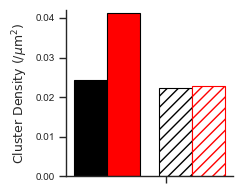

In [65]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, 'WT')

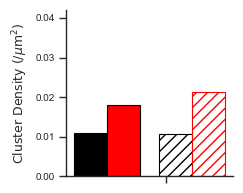

In [66]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(mut, mutPost, 'C2A')

In [67]:
print(D_metrics.iloc[whichRow])

D           0.064906
Dpost       0.057891
C2AD        0.079776
C2ADpost    0.079862
Name: 5, dtype: float64


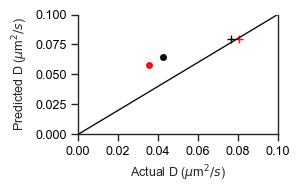

In [68]:
#make a plot that shows actual and predicted diffusion constants for
fig, ax = plt.subplots(figsize=(3, 2))
D=D_metrics['D'].iloc[whichRow]
Dpost=D_metrics['Dpost'].iloc[whichRow]
DC2A=D_metrics['C2AD'].iloc[whichRow]
DC2Apost=D_metrics['C2ADpost'].iloc[whichRow]
ax.plot(model.D_exp_pre,D, markersize=4, marker='o', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_post,Dpost, markersize=4, marker='o', color='red', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_pre,DC2A, markersize=6, marker='+', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_post,DC2Apost, markersize=6, marker='+', color='red', alpha=0.95, zorder=3)
ax.plot(np.arange(0, 10)*0.1,np.arange(0, 10)*0.1, linewidth=1, ls='-', color='black', alpha=0.95, zorder=3)

ax.set_xlim(left=0, right=0.1)
ax.set_ylim(bottom=0, top=0.1)
ax.set_xlabel("Actual D ($\\mu$m$^2/s$)", fontsize=9)
ax.set_ylabel("Predicted D ($\\mu$m$^2/s$)", fontsize=9)
ax.tick_params(axis='both',labelcolor='black', labelsize=9)
#ax.set_xticks([0, 1000,2000])
# Get rid of bound box on the top.
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f"/Users/margaret/Dropbox/r2025/Munc13/IMAGES/Diffusion_actual_vs_predicted.png",dpi=300)
plt.show()

sizes pre stim, and sum:  [np.float64(0.6260267080885062), np.float64(0.3705492951804328), np.float64(0.0033823009687003087)]
sizes POST stim, and sum:  [np.float64(0.44845133515983193), np.float64(0.550345309231626), np.float64(0.0011971423231116698)]


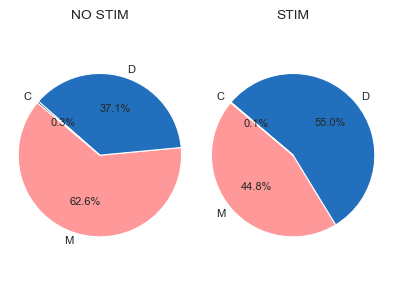

sizes pre stim, and sum:  [np.float64(0.997184449401604), np.float64(0.0), np.float64(0.002288269456043011)]
sizes POST stim, and sum:  [np.float64(0.998258223118971), np.float64(0.0), np.float64(0.001632919003728298)]


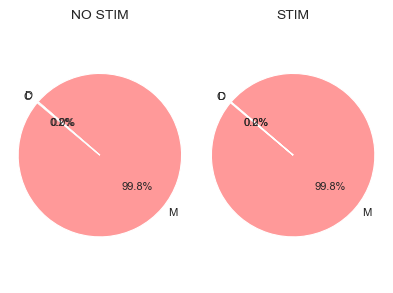

In [69]:
#create pie charts.
model.pie_charts(sol, solPost, [4,3], 'WT')
#create pie charts of the mutant.
model.pie_charts(mut, mutPost, [4,3], 'C2A')

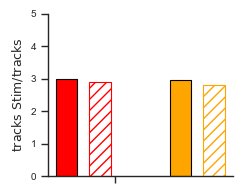

In [70]:
#plot the increase in tracks, experiment vs simulation
model.plot_track_increase_vs_exp(sol, solPost, mut, mutPost, figsize=(2.5, 2))
       

In [71]:
fileStr='C2A'
if fileStr == 'C2A':
    print('C2A')
else:
    print('WT')

C2A


Now do the same thing for the cluster centroids.

In [72]:
#Set up the dataframe with the first solution results
just_parms=sorted_centroid[param_cols]
candidate=just_parms.iloc[0].values
print(candidate)
colWT = ['tau56','tau56Post', 'densPre','densPost','stimFact','percClust','percCPost','percDimer','percDPost','SSval','SSvalPost']
colC2A = ['C2Atau56','C2Atau56Post', 'C2AdensPre','C2AdensPost','C2AstimFact','C2ApercClust','C2ApercCPost','C2ApercDimer','C2ApercDPost','C2ASSval','C2ASSvalPost']

colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
print(len(metricsWT))
clus_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2Aclus_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
Dclus_metrics = pd.DataFrame([metricsD], columns = colD)

[1.07571346e+00 1.28951815e-01 2.73325725e-01 3.51729052e-02
 2.12765473e+00 5.29361061e-02 7.46044345e+00 6.73156387e-01
 1.80348909e-02 3.79059322e-01 1.02802195e-01 6.85572481e-03
 4.24582446e-01 1.80222945e+00 1.45763308e+01 3.49797162e-02
 2.02590831e+00 2.19842309e-02 1.52952273e-01]
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 800.3950715401706. M 363.3671807447877. D 135.70533268616035. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 2278.012674100795. M 799.221719226644. D 656.4790038400095. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 654.553608591253. M 548.0093307588202. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581

In [73]:
#Now iterate over all other solutions in the sorted_centroid array
#add them to the dataframe.
for i in np.arange(1,len(just_parms)):
    candidate=just_parms.iloc[i].values
    print(candidate)
    [metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
    clus_metrics.loc[len(clus_metrics)] = metricsWT
    C2Aclus_metrics.loc[len(C2Aclus_metrics)] = metricsC2A
    Dclus_metrics.loc[len(Dclus_metrics)] = metricsD

print(clus_metrics)
print(Dclus_metrics)

[3.63516287e+00 2.62080487e-02 3.70731939e+00 1.27443933e+00
 5.35918999e+00 1.39598959e+02 9.46397238e+00 7.44635515e-02
 4.88165557e+00 1.82246163e+01 1.00532942e+00 9.16467552e+00
 9.34230318e-02 2.52614800e-01 6.74250657e+01 2.54870305e-03
 1.45095540e+00 2.41952842e-02 5.36766324e+01]
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 686.4791819990285. M 366.6632098414878. D 51.722725859583164. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 1800.5722584529212. M 926.7331223452661. D 330.41826269113164. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.0009302325581395349. DtD3X 0.0009302325581395349. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 566.5053542804692. M 416.57906842231944. D -1.364007659541839e-30. 
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X, 0.000930232558139534

In [74]:
#print these solutions to file
sorted_centroid.to_csv(f"Centroid_solutions_withQ_parameters_{unique_id}.csv", index=False)
clus_metrics.to_csv(f"Centroid_solutions_withQ_WT_{unique_id}.csv")
C2Aclus_metrics.to_csv(f"Centroid_solutions_withQ_C2A_{unique_id}.csv")
Dclus_metrics.to_csv(f"Centroid_solutions_withQ_Diffusion_{unique_id}.csv")

In [75]:
print(model.density_exp_pre, model.density_exp_post)

0.024375 0.04125


In [76]:

# Convert row to array of parameter values
#sol=model.simulate_pre(test_candidate)
#fit = model.fitness_function_to_call(test_candidate)


In [77]:
#whichRow=40193
#candidate = dataF.loc[whichRow][param_cols].values  # Gets all parameter columns for row 50
#whichSol = model.simulate_pre(candidate)
#print(candidate)
##fit = model.fitness_function_to_call(candidate)
#print("fitness of this candidate: ", fit)
#model.test_mass_conservation(whichSol)
#model.plot_freespecies_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_mycluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#plt.figure()
#model.plot_each_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_DX_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12